In [2]:
%matplotlib inline

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Tree and Ensemble Methods

## Live demos

In [7]:
iris_data, iris_labels = load_iris().data, load_iris().target

In [11]:
iris_data.shape

(150, 4)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_labels, train_size = 100, stratify = iris_labels)

In [31]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [32]:
tree = DecisionTreeClassifier(
    criterion = 'entropy'
)

In [33]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
tree.tree_.impurity

array([1.5848187 , 0.        , 0.9998393 , 0.41381685, 0.        ,
       0.97095059, 0.        , 0.91829583, 0.        , 0.        ,
       0.        ])

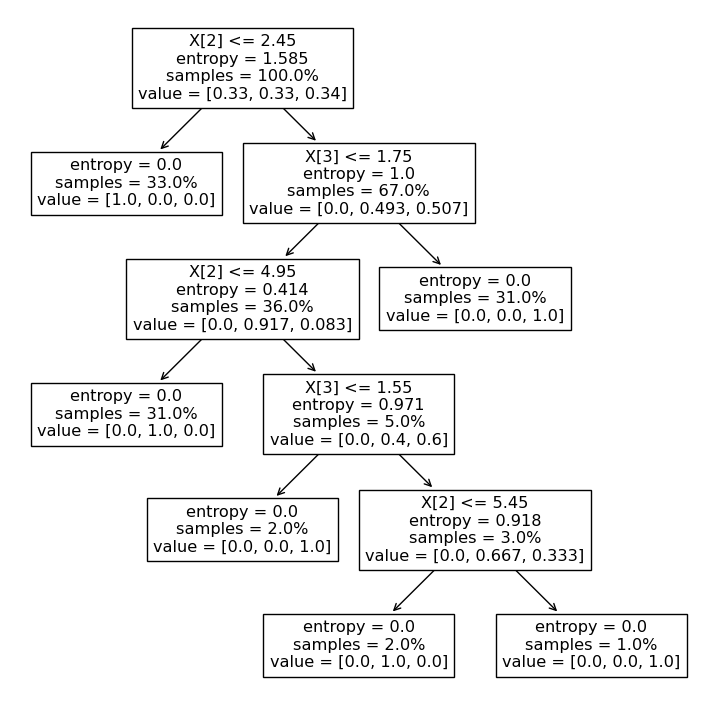

In [35]:
plt.figure(figsize = (9, 9))
plot_tree(tree, proportion=True)
plt.show()

In [36]:
tree.feature_importances_

array([0.        , 0.        , 0.65805747, 0.34194253])

In [37]:
tree.score(X_train, y_train)

1.0

In [39]:
tree.score(X_test, y_test)

0.96

### Create a tree with max_depth = 2

In [40]:
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 2
)

In [41]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

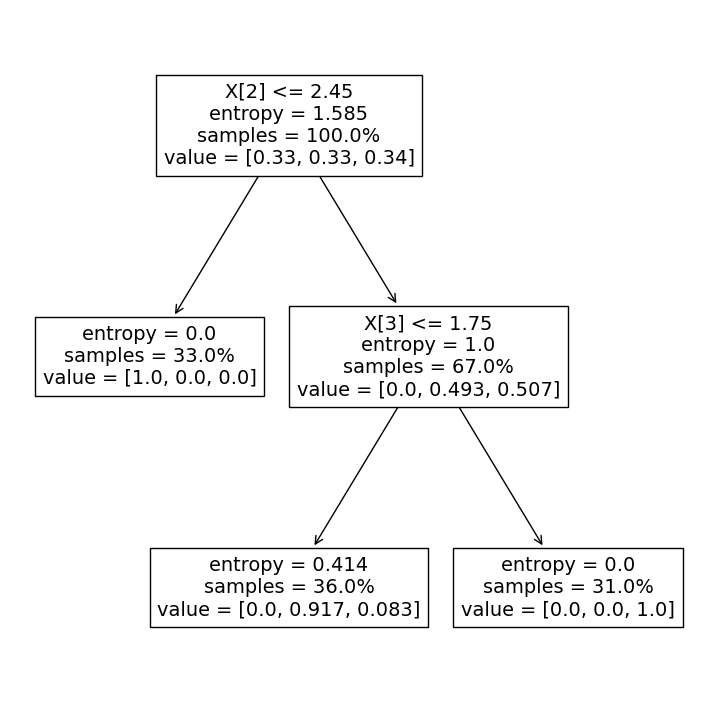

In [42]:
plt.figure(figsize = (9, 9))
plot_tree(tree, proportion=True)
plt.show()

In [43]:
tree.score(X_train, y_train)

0.97

In [44]:
tree.score(X_test, y_test)

0.94

### Fine-tuning using other hyperparameters.

In [50]:
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    min_samples_leaf = 5
)

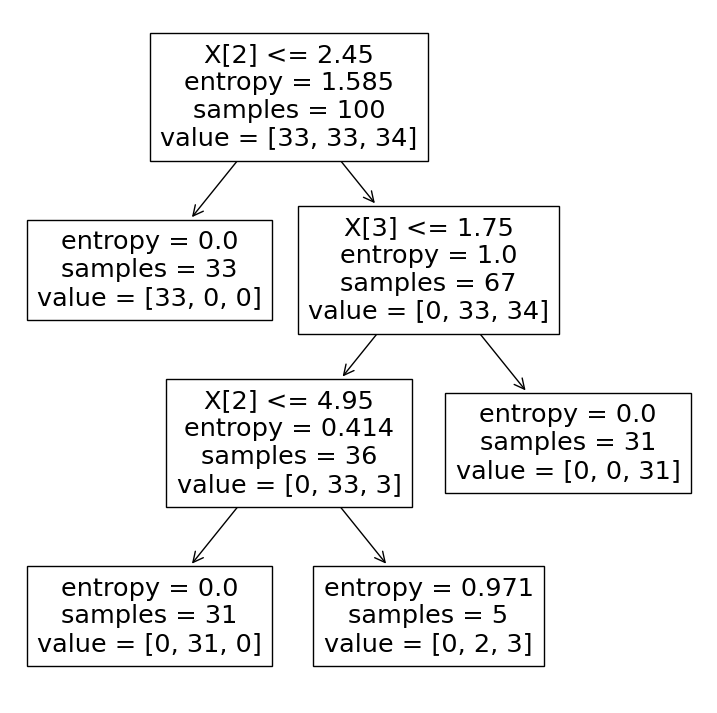

0.98
0.96


In [52]:
tree.fit(X_train, y_train)

plt.figure(figsize = (9, 9))
plot_tree(tree, proportion=False)
plt.show()

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

In [53]:
tree = DecisionTreeClassifier(
    criterion = 'gini',
    min_samples_leaf = 5
)

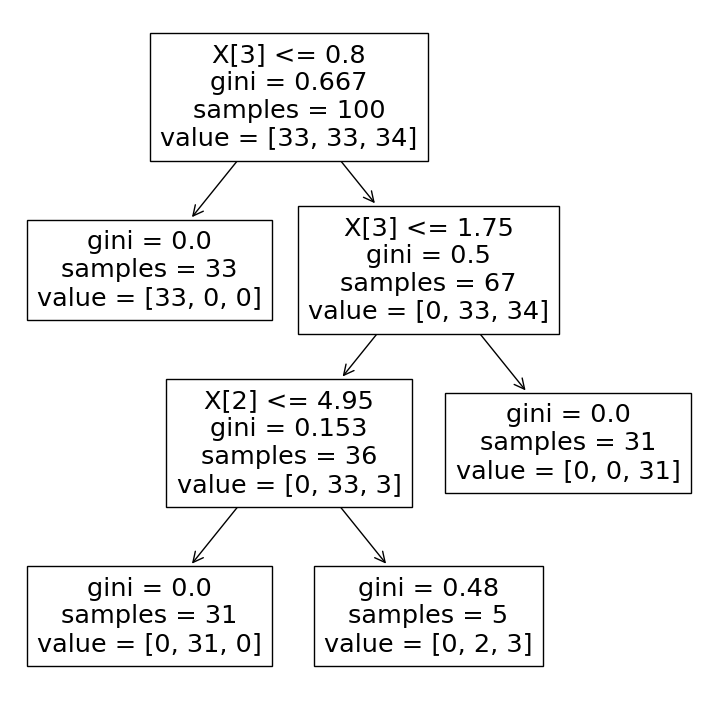

0.98
0.96


In [54]:
tree.fit(X_train, y_train)

plt.figure(figsize = (9, 9))
plot_tree(tree, proportion=False)
plt.show()

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

### Plotting a Decision Tree for two features.

In [57]:
X_plot = iris_data[:, :2] # Sepal length, sepal width
y_plot = iris_labels
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y_plot]
depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X_plot, y_plot)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X_plot, y_plot)
titles = ["Max depth = 2", "Max depth = 4"]

In [58]:
# Create a mesh
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


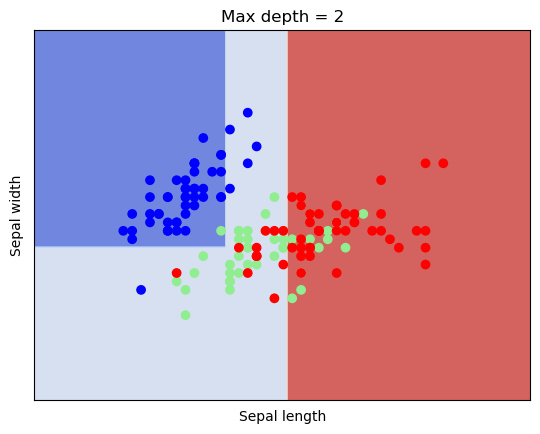

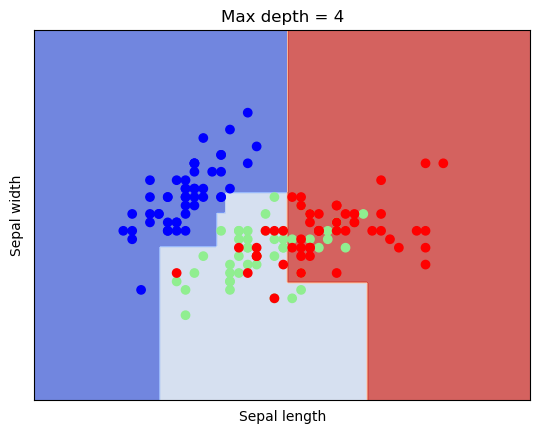

In [61]:
# Create and evaluate predictions for all classifiers
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

### Random Forest

#### Manually creating a forest.

In [64]:
forest = [
    DecisionTreeClassifier(splitter='random', max_depth=5),
    DecisionTreeClassifier(splitter='random', max_depth=5),
    DecisionTreeClassifier(splitter='random', max_depth=5),
    DecisionTreeClassifier(splitter='random', max_depth=5),
]

In [65]:
for tree in forest:
    tree.fit(X_train, y_train)

In [66]:
forest[0].feature_importances_

array([0.0824567, 0.       , 0.       , 0.9175433])

In [67]:
forest[1].feature_importances_

array([0.03144752, 0.08696597, 0.38438443, 0.49720208])

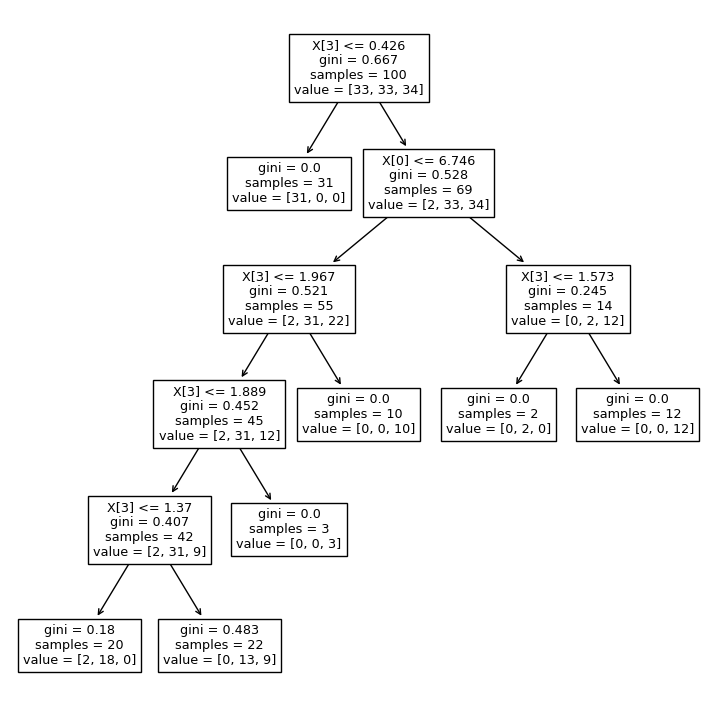

In [69]:
plt.figure(figsize= (9, 9))
plot_tree(forest[0])
plt.show()